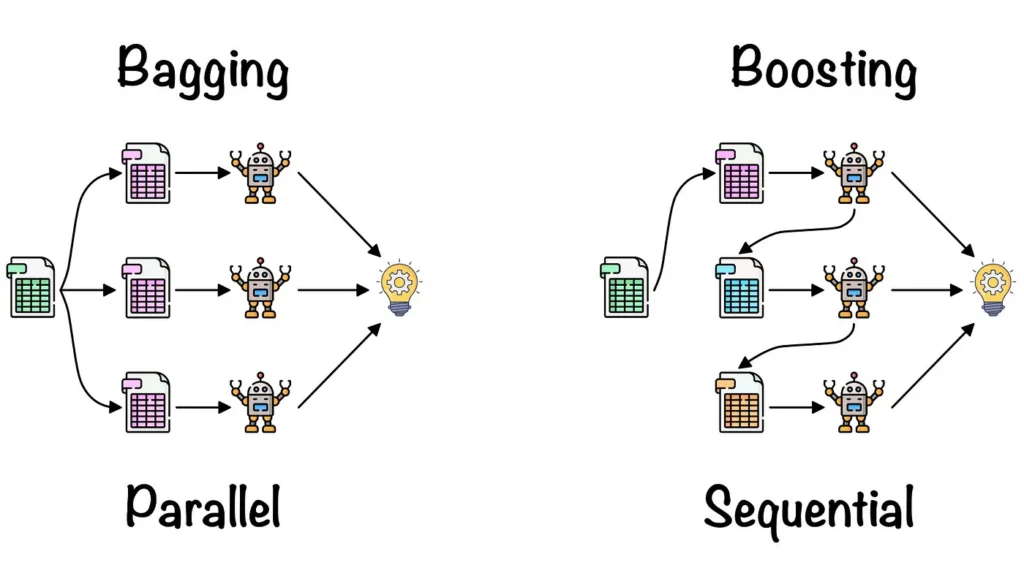

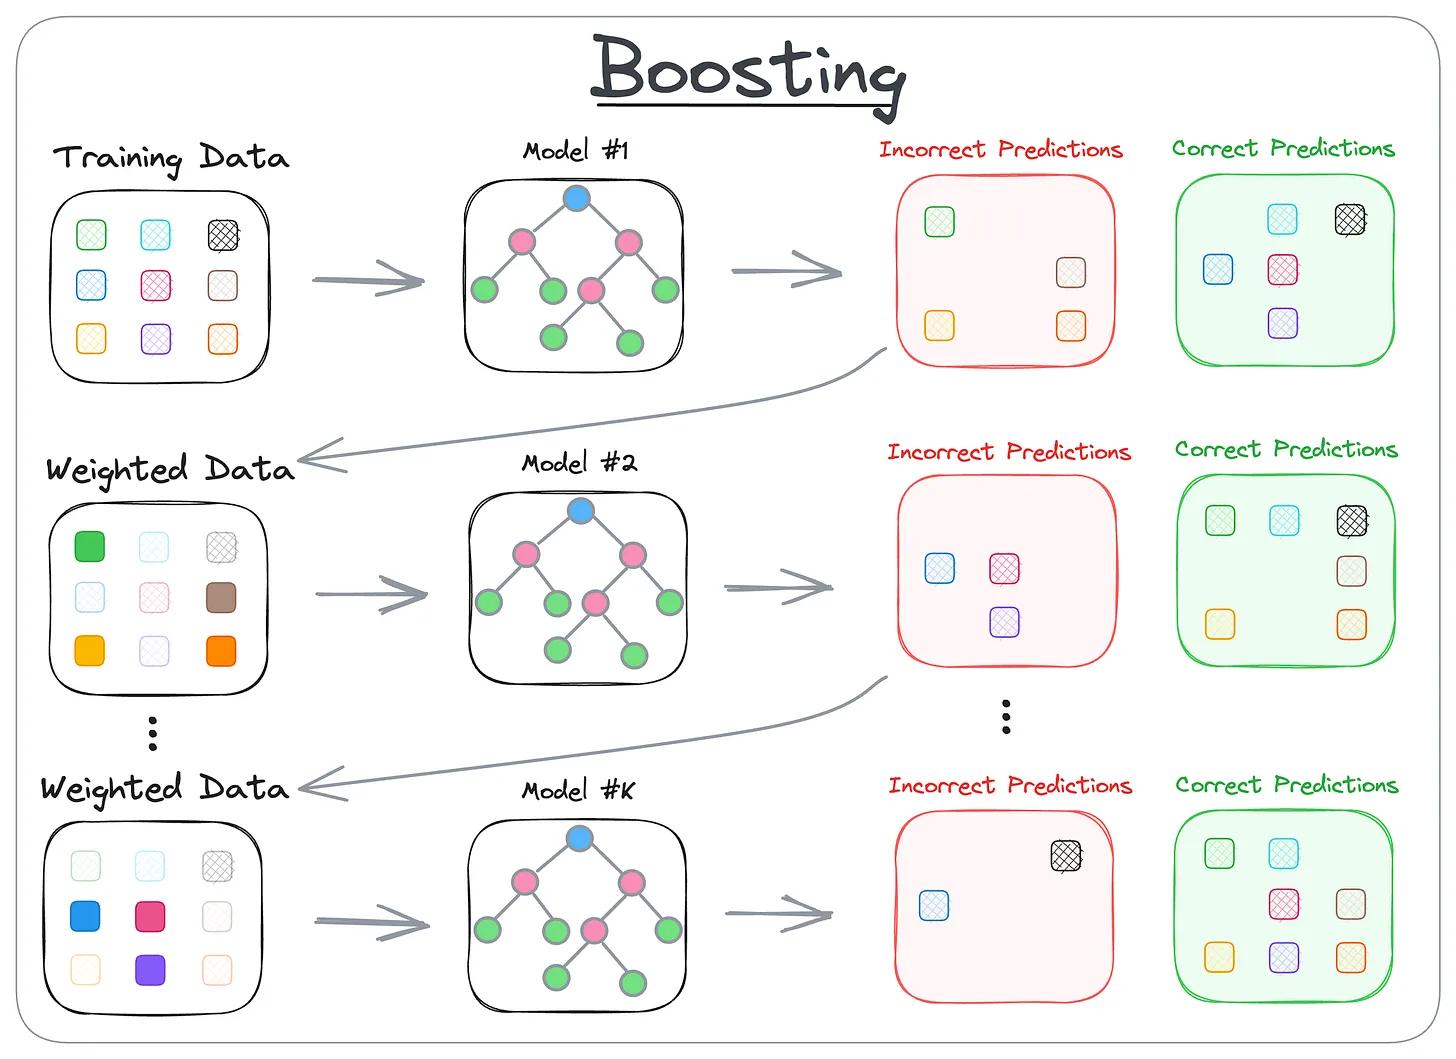

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [22]:
# Example: Using Iris dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 ## 1. AdaBoost Classifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Use a simple decision stump
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

AdaBoost Accuracy: 0.9333333333333333


## 2. XGBoost Classifier



In [ ]:
#!pip install xgboost

In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    reg_lambda=1,
    subsample=0.8,
    colsample_bytree=0.8,
    #use_label_encoder=False,
    eval_metric='mlogloss',  # or 'logloss' for binary
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Accuracy: 1.0


## 3. LightGBM Classifier

In [35]:
#!pip3 install lightgbm

In [10]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    reg_lambda=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/Users/sameerhussain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [11]:
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, lgb_pred))


Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### New Dataset (Titanic) --> Cat Boost

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Titanic dataset from seaborn
import seaborn as sns
df = sns.load_dataset("titanic")

# Drop rows with missing target
df = df.dropna(subset=['survived'])

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']

# Handle missing values simply
X['age'].fillna(X['age'].median(), inplace=True)
X['embarked'].fillna('S', inplace=True)  # most common

# Identify categorical columns
cat_features = ['pclass', 'sex', 'embarked']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/9h/fg1qycbn44g4_n7718gx21bw0000gn/T/ipykernel_40716/3328446517.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
/var/folders/9h/fg1qycbn44g4_n7718gx21bw0000gn/T/ipykernel_40716/3328446517.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inp

In [27]:
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


## 4. CATBoost Classifier

In [34]:
#!pip3 install catboost

In [33]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0  # Set to 100 to see logs
)

# Fit with categorical feature support
model.fit(X_train, y_train, cat_features=cat_features)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


CatBoost Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [39]:
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [125]:
#X['sex'] = X['sex'].replace({'male':1, 'female':0})
X = pd.get_dummies(X, columns=['embarked'], dtype='int')
X = pd.get_dummies(X, columns=['sex'], dtype='int')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler()
X_train = scaled_data.fit_transform(X_train)
X_test = scaled_data.transform(X_test)

In [132]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=98,
    max_depth=12,
    learning_rate=0.1,
    reg_lambda=1.15,
    subsample=0.95,
    colsample_bytree=1,
    random_state=43
)

lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/Users/sameerhussain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [133]:
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, lgb_pred))


Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



In [134]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=12,
    learning_rate=0.05,
    reg_lambda=1.1,
    subsample=1,
    colsample_bytree=0.95,
    #use_label_encoder=False,
    eval_metric='logloss',  # or 'logloss' for binary
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Accuracy: 0.8212290502793296


In [135]:
# Use a simple decision stump
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

AdaBoost Accuracy: 0.7988826815642458
